# __Final Project [Part 8]__

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import astropy.io
from astropy.io import fits

# __Read in the images__

In [42]:
fdata_f105 = "hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits"
fdata_f125 = "hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits"
fdata_f160 = "hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits"

hdu_2 = fits.open(fdata_f105)
hdu_3 = fits.open(fdata_f125)
hdu_4 = fits.open(fdata_f160)

data_2 = hdu_2[0].data
data_3 = hdu_3[0].data
data_4 = hdu_4[0].data

# __Have a look at the data__

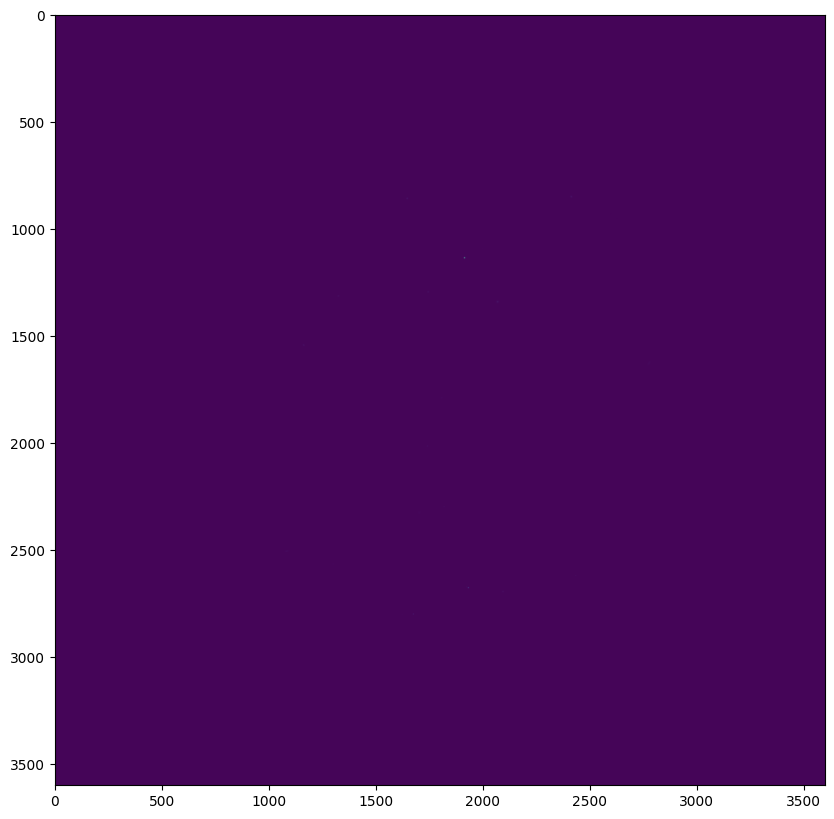

In [43]:
f = plt.figure(figsize=(10,10))
plt.imshow(data_2)

In [44]:
def rescale_image(data):
    pdata_tmp = data.copy()
    m = np.nanmean(pdata_tmp)
    vplmin = m/2
    vpmin = np.log10(vplmin)
    vpmax = np.log10(m * 100.)
    pdata_tmp[pdata_tmp<vplmin] = vplmin
    pdata_tmp = np.log10(pdata_tmp)
    return pdata_tmp,vpmin,vpmax

# __Plot rescaled data__

In [45]:
def fits_quicklook(data,fnx=10,fny=10):
    f = plt.figure(figsize=(fnx,fny))
    pdata_tmp,vpmin,vpmax = rescale_image(data)
    plt.imshow(pdata_tmp,vmin=vpmin,vmax=vpmax)

# __Show the images__

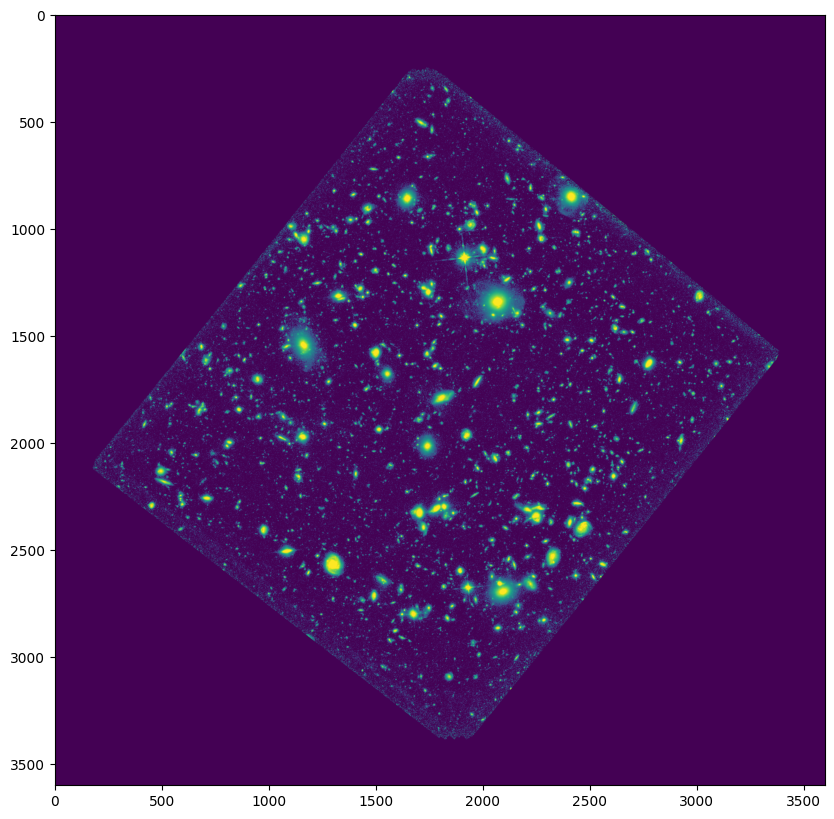

In [46]:
fits_quicklook(data_2)

# __Make it a 3-color image from these data__

In [47]:
data_2_res, d2min, d2max = rescale_image(data_2)
data_3_res, d3min, d3max = rescale_image(data_3)
data_4_res, d4min, d4max = rescale_image(data_4)

data_2_res[data_2_res<d2min] = d2min
data_2_res[data_2_res>d2max] = d2max
data_3_res[data_3_res<d3min] = d3min
data_3_res[data_3_res>d3max] = d3max
data_4_res[data_4_res<d4min] = d4min
data_4_res[data_4_res>d4max] = d4max

# __Create an RGB image__

In [48]:
rgb = np.zeros((data_2_res.shape[0], data_2_res.shape[1], 3))
rgb[:,:,0] = (data_2_res-d2min)/(d2max-d2min)
rgb[:,:,1] = (data_3_res-d3min)/(d3max-d3min)
rgb[:,:,2] = (data_4_res-d4min)/(d4max-d4min)

# __Plot the RGB image and save to a PNG__

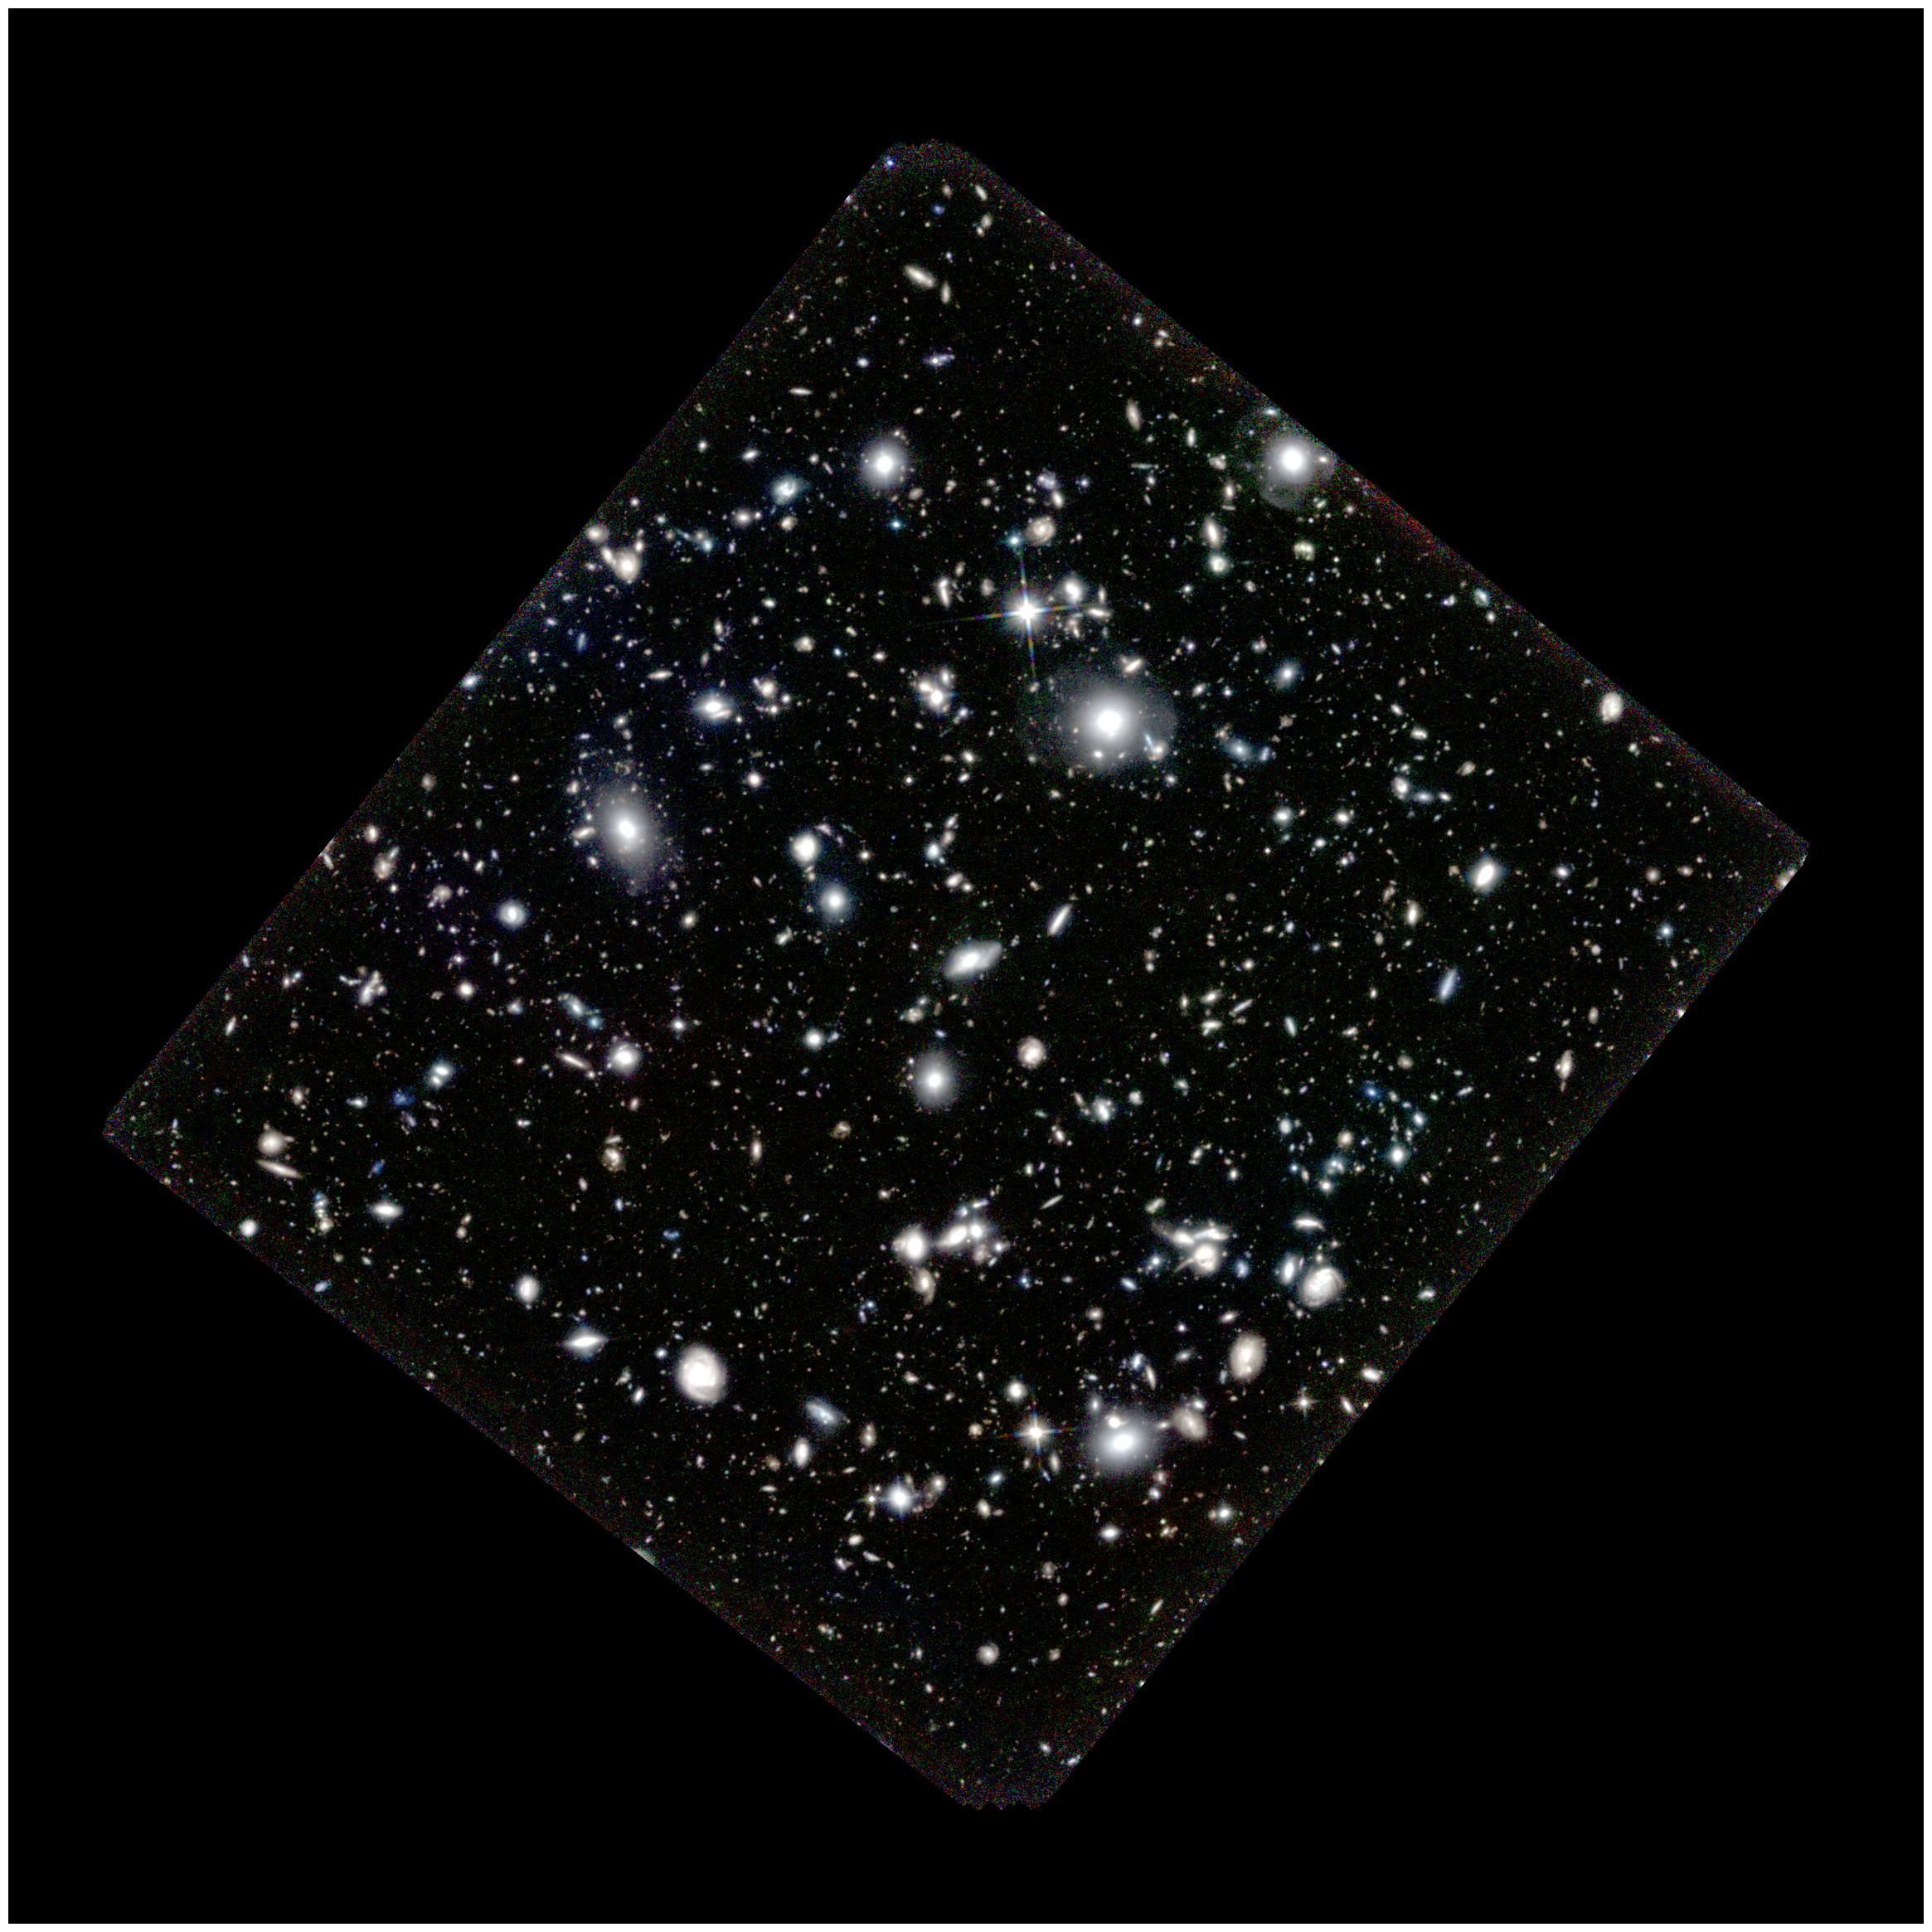

In [49]:
f,ax = plt.subplots(1,1,figsize=(30,30))
ax.axis('off')
ax.imshow(rgb)
plt.savefig('UDF_image.png',bbox_inches='tight',pad_inches=0,dpi=600)
